### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from scipy import signal
import spm1d

### Comparison of performance between subjects

Two-sample test, two-tailed

We have independent groups for which we want to compare the measures of a variable between the groups. The two-sample t-test will le us evaluate if there is a significative difference in the performance between the subjects. This test assumes that the samples are independent and that the observations inside each group present a normal distributiion and have similar variances.

We are interested in determining if there is a significative difference in any direction between two groups. We do not have a priori expectations if one condition is better or worse than the other.


In [8]:
#Load data
dataset_s1 = pd.read_excel('path')
dataset_s2 = pd.read_excel('path')
dataset_s3 = pd.read_excel('path')
dataset_s4 = pd.read_excel('path')
dataset_s5 = pd.read_excel('path')
dataset_s6 = pd.read_excel('path')
dataset_s7 = pd.read_excel('path')
dataset_s8 = pd.read_excel('path')

dataset_s1['Frames'] = dataset_s1['Frames'] - dataset_s1['Frames'].iloc[0]
dataset_s2['Frames'] = dataset_s2['Frames'] - dataset_s2['Frames'].iloc[0]
dataset_s3['Frames'] = dataset_s3['Frames'] - dataset_s3['Frames'].iloc[0]
dataset_s4['Frames'] = dataset_s4['Frames'] - dataset_s4['Frames'].iloc[0]
dataset_s5['Frames'] = dataset_s5['Frames'] - dataset_s5['Frames'].iloc[0]
dataset_s6['Frames'] = dataset_s6['Frames'] - dataset_s6['Frames'].iloc[0]
dataset_s7['Frames'] = dataset_s7['Frames'] - dataset_s7['Frames'].iloc[0]

"""print(len(dataset_s1))
print(len(dataset_s2))
print(len(dataset_s3))
print(len(dataset_s4))
print(len(dataset_s5))
print(len(dataset_s9))
print(len(dataset_s10))"""

#Match the length of the series
new_len = 992 #intermediate length of the samples
dataset_s1 = signal.resample(dataset_s1, new_len)
dataset_s2 = signal.resample(dataset_s2, new_len)
dataset_s3 = signal.resample(dataset_s3, new_len)
dataset_s4 = signal.resample(dataset_s4, new_len)
dataset_s5 = signal.resample(dataset_s5, new_len)
dataset_s6 = signal.resample(dataset_s6, new_len)
dataset_s7 = signal.resample(dataset_s7, new_len)
dataset_s8 = signal.resample(dataset_s8, new_len)

#Normalization
if 'RWJCX' in dataset_s1.columns:
    scaler = MinMaxScaler()
    dataset_s1 = pd.DataFrame(dataset_s1, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y1n = pd.DataFrame(scaler.fit_transform(dataset_s1), columns=dataset_s1.columns)
    dataset_s2 = pd.DataFrame(dataset_s2, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y2n = pd.DataFrame(scaler.fit_transform(dataset_s2), columns=dataset_s2.columns)
    dataset_s3 = pd.DataFrame(dataset_s3, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y3n = pd.DataFrame(scaler.fit_transform(dataset_s3), columns=dataset_s3.columns)
    dataset_s4 = pd.DataFrame(dataset_s4, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y4n = pd.DataFrame(scaler.fit_transform(dataset_s4), columns=dataset_s4.columns)
    dataset_s5 = pd.DataFrame(dataset_s5, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y5n = pd.DataFrame(scaler.fit_transform(dataset_s5), columns=dataset_s5.columns)
    dataset_s6 = pd.DataFrame(dataset_s6, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y6n = pd.DataFrame(scaler.fit_transform(dataset_s6), columns=dataset_s6.columns)
    dataset_s7 = pd.DataFrame(dataset_s7, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y7n = pd.DataFrame(scaler.fit_transform(dataset_s7), columns=dataset_s7.columns)
    dataset_s8 = pd.DataFrame(dataset_s8, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    y8n = pd.DataFrame(scaler.fit_transform(dataset_s8), columns=dataset_s8.columns)
elif 'LWJCX' in dataset_s1.columns:
    scaler = MinMaxScaler()
    dataset_s1 = pd.DataFrame(dataset_s1, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y1n = pd.DataFrame(scaler.fit_transform(dataset_s1), columns=dataset_s1.columns)
    dataset_s2 = pd.DataFrame(dataset_s2, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y2n = pd.DataFrame(scaler.fit_transform(dataset_s2), columns=dataset_s2.columns)
    dataset_s3 = pd.DataFrame(dataset_s3, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y3n = pd.DataFrame(scaler.fit_transform(dataset_s3), columns=dataset_s3.columns)
    dataset_s4 = pd.DataFrame(dataset_s4, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y4n = pd.DataFrame(scaler.fit_transform(dataset_s4), columns=dataset_s4.columns)
    dataset_s5 = pd.DataFrame(dataset_s5, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y5n = pd.DataFrame(scaler.fit_transform(dataset_s5), columns=dataset_s5.columns)
    dataset_s6 = pd.DataFrame(dataset_s6, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y6n = pd.DataFrame(scaler.fit_transform(dataset_s6), columns=dataset_s6.columns)
    dataset_s7 = pd.DataFrame(dataset_s7, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y7n = pd.DataFrame(scaler.fit_transform(dataset_s7), columns=dataset_s7.columns)
    dataset_s8 = pd.DataFrame(dataset_s8, columns=['LWJCX', 'LefttControllerPositionZ', 'LWJCZ', 'LefttControllerPositionY', 'LWJCY', 'LefttControllerPositionX', 'Frames'])
    y8n = pd.DataFrame(scaler.fit_transform(dataset_s8), columns=dataset_s8.columns)
elif 'RELBX' in dataset_s1.columns:
    scaler = MinMaxScaler()
    dataset_s1 = pd.DataFrame(dataset_s1, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y1n = pd.DataFrame(scaler.fit_transform(dataset_s1), columns=dataset_s1.columns)
    dataset_s2 = pd.DataFrame(dataset_s2, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y2n = pd.DataFrame(scaler.fit_transform(dataset_s2), columns=dataset_s2.columns)
    dataset_s3 = pd.DataFrame(dataset_s3, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y3n = pd.DataFrame(scaler.fit_transform(dataset_s3), columns=dataset_s3.columns)
    dataset_s4 = pd.DataFrame(dataset_s4, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y4n = pd.DataFrame(scaler.fit_transform(dataset_s4), columns=dataset_s4.columns)
    dataset_s5 = pd.DataFrame(dataset_s5, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y5n = pd.DataFrame(scaler.fit_transform(dataset_s5), columns=dataset_s5.columns)
    dataset_s6 = pd.DataFrame(dataset_s6, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y6n = pd.DataFrame(scaler.fit_transform(dataset_s6), columns=dataset_s6.columns)
    dataset_s7 = pd.DataFrame(dataset_s7, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y7n = pd.DataFrame(scaler.fit_transform(dataset_s7), columns=dataset_s7.columns)
    dataset_s8 = pd.DataFrame(dataset_s8, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    y8n = pd.DataFrame(scaler.fit_transform(dataset_s8), columns=dataset_s8.columns)
else:
    scaler = MinMaxScaler()
    dataset_s1 = pd.DataFrame(dataset_s1, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y1n = pd.DataFrame(scaler.fit_transform(dataset_s1), columns=dataset_s1.columns)
    dataset_s2 = pd.DataFrame(dataset_s2, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y2n = pd.DataFrame(scaler.fit_transform(dataset_s2), columns=dataset_s2.columns)
    dataset_s3 = pd.DataFrame(dataset_s3, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y3n = pd.DataFrame(scaler.fit_transform(dataset_s3), columns=dataset_s3.columns)
    dataset_s4 = pd.DataFrame(dataset_s4, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y4n = pd.DataFrame(scaler.fit_transform(dataset_s4), columns=dataset_s4.columns)
    dataset_s5 = pd.DataFrame(dataset_s5, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y5n = pd.DataFrame(scaler.fit_transform(dataset_s5), columns=dataset_s5.columns)
    dataset_s6 = pd.DataFrame(dataset_s6, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y6n = pd.DataFrame(scaler.fit_transform(dataset_s6), columns=dataset_s6.columns)
    dataset_s7 = pd.DataFrame(dataset_s7, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y7n = pd.DataFrame(scaler.fit_transform(dataset_s7), columns=dataset_s7.columns)
    dataset_s8 = pd.DataFrame(dataset_s8, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y8n = pd.DataFrame(scaler.fit_transform(dataset_s8), columns=dataset_s8.columns)
    
#Division in planes
if 'RWJCX' in y1n.columns:
    columns_df1 = y1n[['RightControllerPositionX']]
    columns_df2 = y2n[['RightControllerPositionX']]
    columns_df3 = y3n[['RightControllerPositionX']]
    columns_df4 = y4n[['RightControllerPositionX']]
    columns_df5 = y5n[['RightControllerPositionX']]
    columns_df6 = y6n[['RightControllerPositionX']]
    columns_df7 = y7n[['RightControllerPositionX']]
    columns_df8 = y8n[['RightControllerPositionX']]
    dataset_VR_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_sagittal.columns = ['VR_Subject1_sagittal', 'VR_Subject2_sagittal', 'VR_Subject3_sagittal', 'VR_Subject4_sagittal', 'VR_Subject5_sagittal', 'VR_Subject6_sagittal', 'VR_Subject7_sagittal', 'VR_Subject8_sagittal']
    columns_df1 = y1n[['RightControllerPositionY']]
    columns_df2 = y2n[['RightControllerPositionY']]
    columns_df3 = y3n[['RightControllerPositionY']]
    columns_df4 = y4n[['RightControllerPositionY']]
    columns_df5 = y5n[['RightControllerPositionY']]
    columns_df6 = y6n[['RightControllerPositionY']]
    columns_df7 = y7n[['RightControllerPositionY']]
    columns_df8 = y8n[['RightControllerPositionY']]
    dataset_VR_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_transverse.columns = ['VR_Subject1_transverse', 'VR_Subject2_transverse', 'VR_Subject3_transverse', 'VR_Subject4_transverse', 'VR_Subject5_transverse', 'VR_Subject6_transverse', 'VR_Subject7_transverse', 'VR_Subject8_transverse']
    columns_df1 = y1n[['RightControllerPositionZ']]
    columns_df2 = y2n[['RightControllerPositionZ']]
    columns_df3 = y3n[['RightControllerPositionZ']]
    columns_df4 = y4n[['RightControllerPositionZ']]
    columns_df5 = y5n[['RightControllerPositionZ']]
    columns_df6 = y6n[['RightControllerPositionZ']]
    columns_df7 = y7n[['RightControllerPositionZ']]
    columns_df8 = y8n[['RightControllerPositionZ']]
    dataset_VR_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_frontal.columns = ['VR_Subject1_frontal', 'VR_Subject2_frontal', 'VR_Subject3_frontal', 'VR_Subject4_frontal', 'VR_Subject5_frontal', 'VR_Subject6_frontal', 'VR_Subject7_frontal', 'VR_Subject8_frontal']
    columns_df1 = y1n[['RWJCY']]
    columns_df2 = y2n[['RWJCY']]
    columns_df3 = y3n[['RWJCY']]
    columns_df4 = y4n[['RWJCY']]
    columns_df5 = y5n[['RWJCY']]
    columns_df6 = y6n[['RWJCY']]
    columns_df7 = y7n[['RWJCY']]
    columns_df8 = y8n[['RWJCY']]
    dataset_VICON_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_sagittal.columns = ['VICON_Subject1_sagittal', 'VICON_Subject2_sagittal', 'VICON_Subject3_sagittal', 'VICON_Subject4_sagittal', 'VICON_Subject5_sagittal', 'VICON_Subject6_sagittal', 'VICON_Subject7_sagittal', 'VICON_Subject8_sagittal']
    columns_df1 = y1n[['RWJCZ']]
    columns_df2 = y2n[['RWJCZ']]
    columns_df3 = y3n[['RWJCZ']]
    columns_df4 = y4n[['RWJCZ']]
    columns_df5 = y5n[['RWJCZ']]
    columns_df6 = y6n[['RWJCZ']]
    columns_df7 = y7n[['RWJCZ']]
    columns_df8 = y8n[['RWJCZ']]
    dataset_VICON_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_transverse.columns = ['VICON_Subject1_transverse', 'VICON_Subject2_transverse', 'VICON_Subject3_transverse', 'VICON_Subject4_transverse', 'VICON_Subject5_transverse', 'VICON_Subject6_transverse', 'VICON_Subject7_transverse', 'VICON_Subject8_transverse']
    columns_df1 = y1n[['RWJCX']]
    columns_df2 = y2n[['RWJCX']]
    columns_df3 = y3n[['RWJCX']]
    columns_df4 = y4n[['RWJCX']]
    columns_df5 = y5n[['RWJCX']]
    columns_df6 = y6n[['RWJCX']]
    columns_df7 = y7n[['RWJCX']]
    columns_df8 = y8n[['RWJCX']]
    dataset_VICON_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_frontal.columns = ['VICON_Subject1_frontal', 'VICON_Subject2_frontal', 'VICON_Subject3_frontal', 'VICON_Subject4_frontal', 'VICON_Subject5_frontal', 'VICON_Subject6_frontal', 'VICON_Subject7_frontal', 'VICON_Subject8_frontal']
    frames = y1n[['Frames']]
    frames.columns = ['Frames']
    result = pd.concat([dataset_VR_sagittal, dataset_VR_transverse, dataset_VR_frontal, dataset_VICON_sagittal, dataset_VICON_transverse, dataset_VICON_frontal, frames], axis=1)
    result.to_excel('subjects_R_wrist.xlsx', index=False)
    
elif 'LWJCX' in y1n.columns:
    columns_df1 = y1n[['LeftControllerPositionX']]
    columns_df2 = y2n[['LeftControllerPositionX']]
    columns_df3 = y3n[['LeftControllerPositionX']]
    columns_df4 = y4n[['LeftControllerPositionX']]
    columns_df5 = y5n[['LeftControllerPositionX']]
    columns_df6 = y6n[['LeftControllerPositionX']]
    columns_df7 = y7n[['LeftControllerPositionX']]
    columns_df8 = y8n[['LeftControllerPositionX']]
    dataset_VR_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_sagittal.columns = ['VR_Subject1_sagittal', 'VR_Subject2_sagittal', 'VR_Subject3_sagittal', 'VR_Subject4_sagittal', 'VR_Subject5_sagittal', 'VR_Subject6_sagittal', 'VR_Subject7_sagittal', 'VR_Subject8_sagittal']
    columns_df1 = y1n[['LeftControllerPositionY']]
    columns_df2 = y2n[['LeftControllerPositionY']]
    columns_df3 = y3n[['LeftControllerPositionY']]
    columns_df4 = y4n[['LeftControllerPositionY']]
    columns_df5 = y5n[['LeftControllerPositionY']]
    columns_df6 = y6n[['LeftControllerPositionY']]
    columns_df7 = y7n[['LeftControllerPositionY']]
    columns_df8 = y8n[['LeftControllerPositionY']]
    dataset_VR_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_transverse.columns = ['VR_Subject1_transverse', 'VR_Subject2_transverse', 'VR_Subject3_transverse', 'VR_Subject4_transverse', 'VR_Subject5_transverse', 'VR_Subject6_transverse', 'VR_Subject7_transverse', 'VR_Subject8_transverse']
    columns_df1 = y1n[['LeftControllerPositionZ']]
    columns_df2 = y2n[['LeftControllerPositionZ']]
    columns_df3 = y3n[['LeftControllerPositionZ']]
    columns_df4 = y4n[['LeftControllerPositionZ']]
    columns_df5 = y5n[['LeftControllerPositionZ']]
    columns_df6 = y6n[['LeftControllerPositionZ']]
    columns_df7 = y7n[['LeftControllerPositionZ']]
    columns_df8 = y8n[['LeftControllerPositionZ']]
    dataset_VR_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_frontal.columns = ['VR_Subject1_frontal', 'VR_Subject2_frontal', 'VR_Subject3_frontal', 'VR_Subject4_frontal', 'VR_Subject5_frontal', 'VR_Subject6_frontal', 'VR_Subject7_frontal', 'VR_Subject8_frontal']
    columns_df1 = y1n[['LWJCY']]
    columns_df2 = y2n[['LWJCY']]
    columns_df3 = y3n[['LWJCY']]
    columns_df4 = y4n[['LWJCY']]
    columns_df5 = y5n[['LWJCY']]
    columns_df6 = y6n[['LWJCY']]
    columns_df7 = y7n[['LWJCY']]
    columns_df8 = y8n[['LWJCY']]
    dataset_VICON_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_sagittal.columns = ['VICON_Subject1_sagittal', 'VICON_Subject2_sagittal', 'VICON_Subject3_sagittal', 'VICON_Subject4_sagittal', 'VICON_Subject5_sagittal', 'VICON_Subject6_sagittal', 'VICON_Subject7_sagittal', 'VICON_Subject8_sagittal']
    columns_df1 = y1n[['LWJCZ']]
    columns_df2 = y2n[['LWJCZ']]
    columns_df3 = y3n[['LWJCZ']]
    columns_df4 = y4n[['LWJCZ']]
    columns_df5 = y5n[['LWJCZ']]
    columns_df6 = y6n[['LWJCZ']]
    columns_df7 = y7n[['LWJCZ']]
    columns_df8 = y8n[['LWJCZ']]
    dataset_VICON_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_transverse.columns = ['VICON_Subject1_transverse', 'VICON_Subject2_transverse', 'VICON_Subject3_transverse', 'VICON_Subject4_transverse', 'VICON_Subject5_transverse', 'VICON_Subject6_transverse', 'VICON_Subject7_transverse', 'VICON_Subject8_transverse']
    columns_df1 = y1n[['LWJCX']]
    columns_df2 = y2n[['LWJCX']]
    columns_df3 = y3n[['LWJCX']]
    columns_df4 = y4n[['LWJCX']]
    columns_df5 = y5n[['LWJCX']]
    columns_df6 = y6n[['LWJCX']]
    columns_df7 = y7n[['LWJCX']]
    columns_df8 = y8n[['LWJCX']]
    dataset_VICON_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_frontal.columns = ['VICON_Subject1_frontal', 'VICON_Subject2_frontal', 'VICON_Subject3_frontal', 'VICON_Subject4_frontal', 'VICON_Subject5_frontal', 'VICON_Subject6_frontal', 'VICON_Subject7_frontal', 'VICON_Subject8_frontal']
    frames = y1n[['Frames']]
    frames.columns = ['Frames']
    result = pd.concat([dataset_VR_sagittal, dataset_VR_transverse, dataset_VR_frontal, dataset_VICON_sagittal, dataset_VICON_transverse, dataset_VICON_frontal, frames], axis=1)
    result.to_excel('subjects_L_wrist.xlsx', index=False)
    
elif 'RELBX' in y1n.columns:
    columns_df1 = y1n[['RightElbowGlobalPositionX']]
    columns_df2 = y2n[['RightElbowGlobalPositionX']]
    columns_df3 = y3n[['RightElbowGlobalPositionX']]
    columns_df4 = y4n[['RightElbowGlobalPositionX']]
    columns_df5 = y5n[['RightElbowGlobalPositionX']]
    columns_df6 = y6n[['RightElbowGlobalPositionX']]
    columns_df7 = y7n[['RightElbowGlobalPositionX']]
    columns_df8 = y8n[['RightElbowGlobalPositionX']]
    dataset_VR_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_sagittal.columns = ['VR_Subject1_sagittal', 'VR_Subject2_sagittal', 'VR_Subject3_sagittal', 'VR_Subject4_sagittal', 'VR_Subject5_sagittal', 'VR_Subject6_sagittal', 'VR_Subject7_sagittal', 'VR_Subject8_sagittal']
    columns_df1 = y1n[['RightElbowGlobalPositionY']]
    columns_df2 = y2n[['RightElbowGlobalPositionY']]
    columns_df3 = y3n[['RightElbowGlobalPositionY']]
    columns_df4 = y4n[['RightElbowGlobalPositionY']]
    columns_df5 = y5n[['RightElbowGlobalPositionY']]
    columns_df6 = y6n[['RightElbowGlobalPositionY']]
    columns_df7 = y7n[['RightElbowGlobalPositionY']]
    columns_df8 = y8n[['RightElbowGlobalPositionY']]
    dataset_VR_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_transverse.columns = ['VR_Subject1_transverse', 'VR_Subject2_transverse', 'VR_Subject3_transverse', 'VR_Subject4_transverse', 'VR_Subject5_transverse', 'VR_Subject6_transverse', 'VR_Subject7_transverse', 'VR_Subject8_transverse']
    columns_df1 = y1n[['RightElbowGlobalPositionZ']]
    columns_df2 = y2n[['RightElbowGlobalPositionZ']]
    columns_df3 = y3n[['RightElbowGlobalPositionZ']]
    columns_df4 = y4n[['RightElbowGlobalPositionZ']]
    columns_df5 = y5n[['RightElbowGlobalPositionZ']]
    columns_df6 = y6n[['RightElbowGlobalPositionZ']]
    columns_df7 = y7n[['RightElbowGlobalPositionZ']]
    columns_df8 = y8n[['RightElbowGlobalPositionZ']]
    dataset_VR_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_frontal.columns = ['VR_Subject1_frontal', 'VR_Subject2_frontal', 'VR_Subject3_frontal', 'VR_Subject4_frontal', 'VR_Subject5_frontal', 'VR_Subject6_frontal', 'VR_Subject7_frontal', 'VR_Subject8_frontal']
    columns_df1 = y1n[['RELBY']]
    columns_df2 = y2n[['RELBY']]
    columns_df3 = y3n[['RELBY']]
    columns_df4 = y4n[['RELBY']]
    columns_df5 = y5n[['RELBY']]
    columns_df6 = y6n[['RELBY']]
    columns_df7 = y7n[['RELBY']]
    columns_df8 = y8n[['RELBY']]
    dataset_VICON_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_sagittal.columns = ['VICON_Subject1_sagittal', 'VICON_Subject2_sagittal', 'VICON_Subject3_sagittal', 'VICON_Subject4_sagittal', 'VICON_Subject5_sagittal', 'VICON_Subject6_sagittal', 'VICON_Subject7_sagittal', 'VICON_Subject8_sagittal']
    columns_df1 = y1n[['RELBZ']]
    columns_df2 = y2n[['RELBZ']]
    columns_df3 = y3n[['RELBZ']]
    columns_df4 = y4n[['RELBZ']]
    columns_df5 = y5n[['RELBZ']]
    columns_df6 = y6n[['RELBZ']]
    columns_df7 = y7n[['RELBZ']]
    columns_df8 = y8n[['RELBZ']]
    dataset_VICON_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_transverse.columns = ['VICON_Subject1_transverse', 'VICON_Subject2_transverse', 'VICON_Subject3_transverse', 'VICON_Subject4_transverse', 'VICON_Subject5_transverse', 'VICON_Subject6_transverse', 'VICON_Subject7_transverse', 'VICON_Subject8_transverse']
    columns_df1 = y1n[['RELBX']]
    columns_df2 = y2n[['RELBX']]
    columns_df3 = y3n[['RELBX']]
    columns_df4 = y4n[['RELBX']]
    columns_df5 = y5n[['RELBX']]
    columns_df6 = y6n[['RELBX']]
    columns_df7 = y7n[['RELBX']]
    columns_df8 = y8n[['RELBX']]
    dataset_VICON_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_frontal.columns = ['VICON_Subject1_frontal', 'VICON_Subject2_frontal', 'VICON_Subject3_frontal', 'VICON_Subject4_frontal', 'VICON_Subject5_frontal', 'VICON_Subject6_frontal', 'VICON_Subject7_frontal', 'VICON_Subject8_frontal']
    frames = y1n[['Frames']]
    frames.columns = ['Frames']
    result = pd.concat([dataset_VR_sagittal, dataset_VR_transverse, dataset_VR_frontal, dataset_VICON_sagittal, dataset_VICON_transverse, dataset_VICON_frontal, frames], axis=1)
    result.to_excel('subjects_R_elbow.xlsx', index=False)

else:
    columns_df1 = y1n[['LeftElbowGlobalPositionX']]
    columns_df2 = y2n[['LeftElbowGlobalPositionX']]
    columns_df3 = y3n[['LeftElbowGlobalPositionX']]
    columns_df4 = y4n[['LeftElbowGlobalPositionX']]
    columns_df5 = y5n[['LeftElbowGlobalPositionX']]
    columns_df6 = y6n[['LeftElbowGlobalPositionX']]
    columns_df7 = y7n[['LeftElbowGlobalPositionX']]
    columns_df8 = y8n[['LeftElbowGlobalPositionX']]
    dataset_VR_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_sagittal.columns = ['VR_Subject1_sagittal', 'VR_Subject2_sagittal', 'VR_Subject3_sagittal', 'VR_Subject4_sagittal', 'VR_Subject5_sagittal', 'VR_Subject6_sagittal', 'VR_Subject7_sagittal', 'VR_Subject8_sagittal']
    columns_df1 = y1n[['LeftElbowGlobalPositionY']]
    columns_df2 = y2n[['LeftElbowGlobalPositionY']]
    columns_df3 = y3n[['LeftElbowGlobalPositionY']]
    columns_df4 = y4n[['LeftElbowGlobalPositionY']]
    columns_df5 = y5n[['LeftElbowGlobalPositionY']]
    columns_df6 = y6n[['LeftElbowGlobalPositionY']]
    columns_df7 = y7n[['LeftElbowGlobalPositionY']]
    columns_df8 = y8n[['LeftElbowGlobalPositionY']]
    dataset_VR_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_transverse.columns = ['VR_Subject1_transverse', 'VR_Subject2_transverse', 'VR_Subject3_transverse', 'VR_Subject4_transverse', 'VR_Subject5_transverse', 'VR_Subject6_transverse', 'VR_Subject7_transverse', 'VR_Subject8_transverse']
    columns_df1 = y1n[['LeftElbowGlobalPositionZ']]
    columns_df2 = y2n[['LeftElbowGlobalPositionZ']]
    columns_df3 = y3n[['LeftElbowGlobalPositionZ']]
    columns_df4 = y4n[['LeftElbowGlobalPositionZ']]
    columns_df5 = y5n[['LeftElbowGlobalPositionZ']]
    columns_df6 = y6n[['LeftElbowGlobalPositionZ']]
    columns_df7 = y7n[['LeftElbowGlobalPositionZ']]
    columns_df8 = y8n[['LeftElbowGlobalPositionZ']]
    dataset_VR_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VR_frontal.columns = ['VR_Subject1_frontal', 'VR_Subject2_frontal', 'VR_Subject3_frontal', 'VR_Subject4_frontal', 'VR_Subject5_frontal', 'VR_Subject6_frontal', 'VR_Subject7_frontal', 'VR_Subject8_frontal']
    columns_df1 = y1n[['LELBY']]
    columns_df2 = y2n[['LELBY']]
    columns_df3 = y3n[['LELBY']]
    columns_df4 = y4n[['LELBY']]
    columns_df5 = y5n[['LELBY']]
    columns_df6 = y6n[['LELBY']]
    columns_df7 = y7n[['LELBY']]
    columns_df8 = y8n[['LELBY']]
    dataset_VICON_sagittal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_sagittal.columns = ['VICON_Subject1_sagittal', 'VICON_Subject2_sagittal', 'VICON_Subject3_sagittal', 'VICON_Subject4_sagittal', 'VICON_Subject5_sagittal', 'VICON_Subject6_sagittal', 'VICON_Subject7_sagittal', 'VICON_Subject8_sagittal']
    columns_df1 = y1n[['LELBZ']]
    columns_df2 = y2n[['LELBZ']]
    columns_df3 = y3n[['LELBZ']]
    columns_df4 = y4n[['LELBZ']]
    columns_df5 = y5n[['LELBZ']]
    columns_df6 = y6n[['LELBZ']]
    columns_df7 = y7n[['LELBZ']]
    columns_df8 = y8n[['LELBZ']]
    dataset_VICON_transverse = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_transverse.columns = ['VICON_Subject1_transverse', 'VICON_Subject2_transverse', 'VICON_Subject3_transverse', 'VICON_Subject4_transverse', 'VICON_Subject5_transverse', 'VICON_Subject6_transverse', 'VICON_Subject7_transverse', 'VICON_Subject8_transverse']
    columns_df1 = y1n[['LELBX']]
    columns_df2 = y2n[['LELBX']]
    columns_df3 = y3n[['LELBX']]
    columns_df4 = y4n[['LELBX']]
    columns_df5 = y5n[['LELBX']]
    columns_df6 = y6n[['LELBX']]
    columns_df7 = y7n[['LELBX']]
    columns_df8 = y8n[['LELBX']]
    dataset_VICON_frontal = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5, columns_df6, columns_df7, columns_df8], axis=1)
    dataset_VICON_frontal.columns = ['VICON_Subject1_frontal', 'VICON_Subject2_frontal', 'VICON_Subject3_frontal', 'VICON_Subject4_frontal', 'VICON_Subject5_frontal', 'VICON_Subject6_frontal', 'VICON_Subject7_frontal', 'VICON_Subject8_frontal']
    frames = y1n[['Frames']]
    frames.columns = ['Frames']
    result = pd.concat([dataset_VR_sagittal, dataset_VR_transverse, dataset_VR_frontal, dataset_VICON_sagittal, dataset_VICON_transverse, dataset_VICON_frontal, frames], axis=1)
    result.to_excel('subjects_L_elbow.xlsx', index=False)
    
    
    
#test
data_vr = np.transpose(dataset_VR_frontal)
data_vicon = np.transpose(dataset_VICON_frontal)
#data_vr = np.transpose(dataset_VR_transverse)
#data_vicon = np.transpose(dataset_VICON_transverse)
#data_vr = np.transpose(dataset_VR_sagittal)
#data_vicon = np.transpose(dataset_VICON_sagittal)

#(1) Conduct non-parametric test:
np.random.seed(0)
alpha = 0.05
two_tailed = True
snpm = spm1d.stats.nonparam.ttest2(data_vr, data_vicon)
snpmi = snpm.inference(alpha, two_tailed=two_tailed, iterations=20)
print(snpmi)
print(snpmi.clusters)

#(2) Compare with parametric result:
spm = spm1d.stats.ttest2(data_vr, data_vicon)
spmi = spm.inference(alpha, two_tailed=two_tailed)
print(spmi)
print(snpmi.clusters)

#(3) Plot
plt.close('all')
plt.figure(figsize=(10,4))

ax0 = plt.subplot(121)
ax1 = plt.subplot(122)
labels = 'Parametric', 'Non-parametric'
for ax,zi,label in zip([ax0,ax1], [spmi,snpmi], labels):
	zi.plot(ax=ax)
	zi.plot_threshold_label(ax=ax, fontsize=8)
	zi.plot_p_values(ax=ax, size=10)
	ax.set_title('Non-parametric t-test')
plt.tight_layout()
plt.savefig('nonparam.jpg')
plt.show()

### Comparison of the performance of the subject in different series

Paired test, two-tailed

We are using the Paired t-test because the observations in the groups to evaluate are related between them, in this case, the different series are performed by the same subject. We are comparing the differences between the paired observations instead of directly comparing the individual observations.


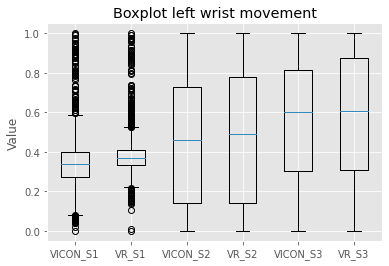

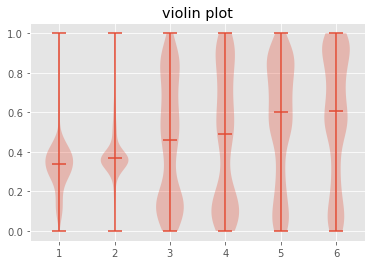

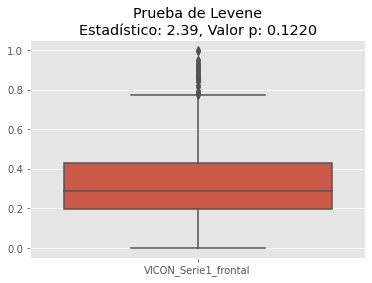

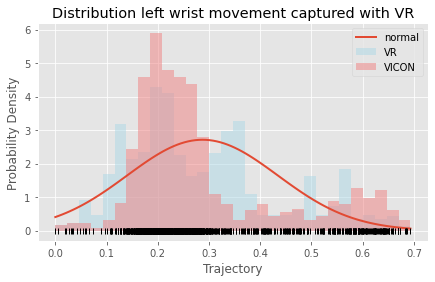

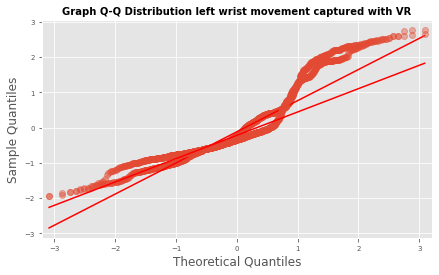

Estadístico = 68.97856669278049, p-value = 1.0507382880037065e-15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


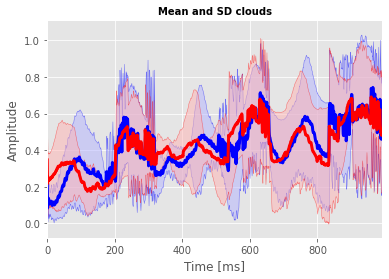

t-statistic = -0.7812602208682609
p-value = 0.4347427677220519
Probably the same distribution


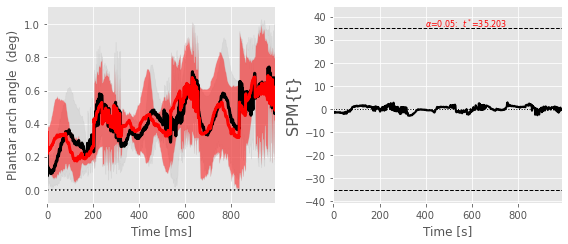

SnPM{T} inference field
   SPM.z              :  (1x992) raw test stat field
   SnPM.nPermUnique   :  70 permutations possible
Inference:
   SPM.alpha          :  0.050
   SPM.zstar          :  7.76716
   SPM.h0reject       :  False
   SPM.p              :  ()

[]
SPM{t} inference field
   SPM.z         :  (1x992) raw test stat field
   SPM.df        :  (1, 5.998)
   SPM.fwhm      :  12.92059
   SPM.resels    :  (1, 76.69928)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  9.01286
   SPM.h0reject  :  False
   SPM.p_set     :  1.000
   SPM.p_cluster :  ()



[]


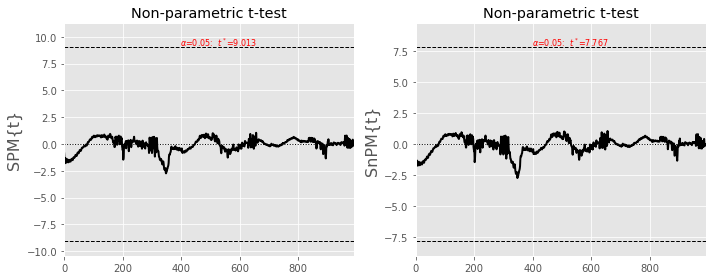

In [30]:
#Load data
dataset_s1_EE = pd.read_excel('path')
dataset_s1_F = pd.read_excel('path')
dataset_s1_EE['Frames'] = (dataset_s1_EE['Frames'] - dataset_s1_EE['Frames'].iloc[0])/100
dataset_s1_F['Frames'] = (dataset_s1_F['Frames'] - dataset_s1_EE['Frames'].iloc[0])/100

dataset_s2_EE = pd.read_excel('path')
dataset_s2_F = pd.read_excel('path')
dataset_s2_EE['Frames'] = (dataset_s2_EE['Frames'] - dataset_s2_EE['Frames'].iloc[0])/100
dataset_s2_F['Frames'] = (dataset_s2_F['Frames'] - dataset_s2_EE['Frames'].iloc[0])/100

dataset_s3_EE = pd.read_excel('path')
dataset_s3_F = pd.read_excel('path')
dataset_s3_EE['Frames'] = (dataset_s3_EE['Frames'] - dataset_s3_EE['Frames'].iloc[0])/100
dataset_s3_F['Frames'] = (dataset_s3_F['Frames'] - dataset_s3_EE['Frames'].iloc[0])/100

R_dataset_s1_EE = pd.read_excel('path')
R_dataset_s1_F = pd.read_excel('path')
R_dataset_s1_EE['Frames'] = (R_dataset_s1_EE['Frames'] - R_dataset_s1_EE['Frames'].iloc[0])/100
R_dataset_s1_F['Frames'] = (R_dataset_s1_F['Frames'] - R_dataset_s1_EE['Frames'].iloc[0])/100

R_dataset_s2_EE = pd.read_excel('path')
R_dataset_s2_F = pd.read_excel('path')
R_dataset_s2_EE['Frames'] = (R_dataset_s2_EE['Frames'] - R_dataset_s2_EE['Frames'].iloc[0])/100
R_dataset_s2_F['Frames'] = (R_dataset_s2_F['Frames'] - R_dataset_s2_EE['Frames'].iloc[0])/100

R_dataset_s3_EE = pd.read_excel('path')
R_dataset_s3_F = pd.read_excel('path')
R_dataset_s3_EE['Frames'] = (R_dataset_s3_EE['Frames'] - R_dataset_s3_EE['Frames'].iloc[0])/100
R_dataset_s3_F['Frames'] = (R_dataset_s3_F['Frames'] - R_dataset_s3_EE['Frames'].iloc[0])/100


#Match the length of the series
new_len = len(dataset_s2_EE['Frames'])
dataset_s1_EE = signal.resample(dataset_s1_EE, new_len)
dataset_s2_EE = signal.resample(dataset_s2_EE, new_len)
dataset_s3_EE = signal.resample(dataset_s3_EE, new_len)

new_len = len(dataset_s2_F['Frames'])
dataset_s1_F = signal.resample(dataset_s1_F, new_len)
dataset_s2_F = signal.resample(dataset_s2_F, new_len)
dataset_s3_F = signal.resample(dataset_s3_F, new_len)

new_len = len(R_dataset_s2_EE['Frames'])
R_dataset_s1_EE = signal.resample(R_dataset_s1_EE, new_len)
R_dataset_s2_EE = signal.resample(R_dataset_s2_EE, new_len)
R_dataset_s3_EE = signal.resample(R_dataset_s3_EE, new_len)

new_len = len(R_dataset_s2_F['Frames'])
R_dataset_s1_F = signal.resample(R_dataset_s1_F, new_len)
R_dataset_s2_F = signal.resample(R_dataset_s2_F, new_len)
R_dataset_s3_F = signal.resample(R_dataset_s3_F, new_len)

#Normalization
if 'LWJCX' in dataset_s1_EE.columns:
    scaler = MinMaxScaler()
    dataset_s1_EE = pd.DataFrame(dataset_s1_EE, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    y1n_EE = pd.DataFrame(scaler.fit_transform(dataset_s1_EE), columns=dataset_s1_EE.columns)
    dataset_s1_F = pd.DataFrame(dataset_s1_F, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    y1n_F = pd.DataFrame(scaler.fit_transform(dataset_s1_F), columns=dataset_s1_F.columns)

    dataset_s2_EE = pd.DataFrame(dataset_s2_EE, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    y2n_EE = pd.DataFrame(scaler.fit_transform(dataset_s2_EE), columns=dataset_s2_EE.columns)
    dataset_s2_F = pd.DataFrame(dataset_s2_F, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    y2n_F = pd.DataFrame(scaler.fit_transform(dataset_s2_F), columns=dataset_s2_F.columns)

    dataset_s3_EE = pd.DataFrame(dataset_s3_EE, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    y3n_EE = pd.DataFrame(scaler.fit_transform(dataset_s3_EE), columns=dataset_s3_EE.columns)
    dataset_s3_F = pd.DataFrame(dataset_s3_F, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    y3n_F = pd.DataFrame(scaler.fit_transform(dataset_s3_F), columns=dataset_s3_F.columns)
    
    scaler = MinMaxScaler()
    R_dataset_s1_EE = pd.DataFrame(R_dataset_s1_EE, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    R_y1n_EE = pd.DataFrame(scaler.fit_transform(R_dataset_s1_EE), columns=R_dataset_s1_EE.columns)
    R_dataset_s1_F = pd.DataFrame(R_dataset_s1_F, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    R_y1n_F = pd.DataFrame(scaler.fit_transform(R_dataset_s1_F), columns=R_dataset_s1_F.columns)

    R_dataset_s2_EE = pd.DataFrame(R_dataset_s2_EE, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    R_y2n_EE = pd.DataFrame(scaler.fit_transform(R_dataset_s2_EE), columns=R_dataset_s2_EE.columns)
    R_dataset_s2_F = pd.DataFrame(R_dataset_s2_F, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    R_y2n_F = pd.DataFrame(scaler.fit_transform(R_dataset_s2_F), columns=R_dataset_s2_F.columns)

    R_dataset_s3_EE = pd.DataFrame(R_dataset_s3_EE, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    R_y3n_EE = pd.DataFrame(scaler.fit_transform(R_dataset_s3_EE), columns=R_dataset_s3_EE.columns)
    R_dataset_s3_F = pd.DataFrame(R_dataset_s3_F, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
    R_y3n_F = pd.DataFrame(scaler.fit_transform(R_dataset_s3_F), columns=R_dataset_s3_F.columns)

else:
    scaler = MinMaxScaler()
    dataset_s1_EE = pd.DataFrame(dataset_s1_EE, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y1n_EE = pd.DataFrame(scaler.fit_transform(dataset_s1_EE), columns=dataset_s1_EE.columns)
    dataset_s1_F = pd.DataFrame(dataset_s1_F, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y1n_F = pd.DataFrame(scaler.fit_transform(dataset_s1_F), columns=dataset_s1_F.columns)

    dataset_s2_EE = pd.DataFrame(dataset_s2_EE, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y2n_EE = pd.DataFrame(scaler.fit_transform(dataset_s2_EE), columns=dataset_s2_EE.columns)
    dataset_s2_F = pd.DataFrame(dataset_s2_F, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y2n_F = pd.DataFrame(scaler.fit_transform(dataset_s2_F), columns=dataset_s2_F.columns)

    dataset_s3_EE = pd.DataFrame(dataset_s3_EE, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y3n_EE = pd.DataFrame(scaler.fit_transform(dataset_s3_EE), columns=dataset_s3_EE.columns)
    dataset_s3_F = pd.DataFrame(dataset_s3_F, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
    y3n_F = pd.DataFrame(scaler.fit_transform(dataset_s3_F), columns=dataset_s3_F.columns)
    
    scaler = MinMaxScaler()
    R_dataset_s1_EE = pd.DataFrame(R_dataset_s1_EE, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    R_y1n_EE = pd.DataFrame(scaler.fit_transform(R_dataset_s1_EE), columns=R_dataset_s1_EE.columns)
    R_dataset_s1_F = pd.DataFrame(R_dataset_s1_F, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    R_y1n_F = pd.DataFrame(scaler.fit_transform(R_dataset_s1_F), columns=R_dataset_s1_F.columns)

    R_dataset_s2_EE = pd.DataFrame(R_dataset_s2_EE, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    R_y2n_EE = pd.DataFrame(scaler.fit_transform(R_dataset_s2_EE), columns=R_dataset_s2_EE.columns)
    R_dataset_s2_F = pd.DataFrame(R_dataset_s2_F, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    R_y2n_F = pd.DataFrame(scaler.fit_transform(R_dataset_s2_F), columns=R_dataset_s2_F.columns)

    R_dataset_s3_EE = pd.DataFrame(R_dataset_s3_EE, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    R_y3n_EE = pd.DataFrame(scaler.fit_transform(R_dataset_s3_EE), columns=R_dataset_s3_EE.columns)
    R_dataset_s3_F = pd.DataFrame(R_dataset_s3_F, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
    R_y3n_F = pd.DataFrame(scaler.fit_transform(R_dataset_s3_F), columns=R_dataset_s3_F.columns)

#Division in planes
if 'LWJCX' in dataset_s1_EE.columns:
    columns_df1 = R_y1n_EE[['RightControllerPositionX']]
    columns_df2 = R_y2n_EE[['RightControllerPositionX']]
    columns_df3 = R_y3n_EE[['RightControllerPositionX']]
    R_dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = R_y1n_EE[['RightControllerPositionY']]
    columns_df2 = R_y2n_EE[['RightControllerPositionY']]
    columns_df3 = R_y3n_EE[['RightControllerPositionY']]
    R_dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = R_y1n_EE[['RightControllerPositionZ']]
    columns_df2 = R_y2n_EE[['RightControllerPositionZ']]
    columns_df3 = R_y3n_EE[['RightControllerPositionZ']]
    R_dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = R_y1n_EE[['RWJCY']]
    columns_df2 = R_y2n_EE[['RWJCY']]
    columns_df3 = R_y3n_EE[['RWJCY']]
    R_dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = R_y1n_EE[['RWJCZ']]
    columns_df2 = R_y2n_EE[['RWJCZ']]
    columns_df3 = R_y3n_EE[['RWJCZ']]
    R_dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = R_y1n_EE[['RWJCX']]
    columns_df2 = R_y2n_EE[['RWJCX']]
    columns_df3 = R_y3n_EE[['RWJCX']]
    columns_df4 = R_y1n_EE[['Frames']]
    R_dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    R_dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([R_dataset_VR_EE1, R_dataset_VICON_EE1, R_dataset_VR_EE2, R_dataset_VICON_EE2, R_dataset_VR_EE3, R_dataset_VICON_EE3], axis=1)
    result.to_excel('rightWrist_EE_Norm.xlsx', index=False)
    
    columns_df1 = y1n_EE[['LeftControllerPositionX']]
    columns_df2 = y2n_EE[['LeftControllerPositionX']]
    columns_df3 = y3n_EE[['LeftControllerPositionX']]
    dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = y1n_EE[['LeftControllerPositionY']]
    columns_df2 = y2n_EE[['LeftControllerPositionY']]
    columns_df3 = y3n_EE[['LeftControllerPositionY']]
    dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = y1n_EE[['LeftControllerPositionZ']]
    columns_df2 = y2n_EE[['LeftControllerPositionZ']]
    columns_df3 = y3n_EE[['LeftControllerPositionZ']]
    dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = y1n_EE[['RWJCY']]
    columns_df2 = y2n_EE[['RWJCY']]
    columns_df3 = y3n_EE[['RWJCY']]
    dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = y1n_EE[['RWJCZ']]
    columns_df2 = y2n_EE[['RWJCZ']]
    columns_df3 = y3n_EE[['RWJCZ']]
    dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = y1n_EE[['RWJCX']]
    columns_df2 = y2n_EE[['RWJCX']]
    columns_df3 = y3n_EE[['RWJCX']]
    columns_df4 = y1n_EE[['RWJCX']]
    dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([dataset_VR_EE1, dataset_VICON_EE1, dataset_VR_EE2, dataset_VICON_EE2, dataset_VR_EE3, dataset_VICON_EE3], axis=1)
    result.to_excel('leftWrist_EE_Norm.xlsx', index=False)
    
    columns_df1 = R_y1n_F[['RightControllerPositionX']]
    columns_df2 = R_y2n_F[['RightControllerPositionX']]
    columns_df3 = R_y3n_F[['RightControllerPositionX']]
    R_dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = R_y1n_F[['RightControllerPositionY']]
    columns_df2 = R_y2n_F[['RightControllerPositionY']]
    columns_df3 = R_y3n_F[['RightControllerPositionY']]
    R_dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = R_y1n_F[['RightControllerPositionZ']]
    columns_df2 = R_y2n_F[['RightControllerPositionZ']]
    columns_df3 = R_y3n_F[['RightControllerPositionZ']]
    R_dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = R_y1n_F[['RWJCY']]
    columns_df2 = R_y2n_F[['RWJCY']]
    columns_df3 = R_y3n_F[['RWJCY']]
    R_dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = R_y1n_F[['RWJCZ']]
    columns_df2 = R_y2n_F[['RWJCZ']]
    columns_df3 = R_y3n_F[['RWJCZ']]
    R_dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = R_y1n_F[['RWJCX']]
    columns_df2 = R_y2n_F[['RWJCX']]
    columns_df3 = R_y3n_F[['RWJCX']]
    columns_df4 = R_y1n_F[['Frames']]
    R_dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    R_dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([R_dataset_VR_F1, R_dataset_VICON_F1, R_dataset_VR_F2, R_dataset_VICON_F2, R_dataset_VR_F3, R_dataset_VICON_F3], axis=1)
    result.to_excel('rightWrist_F_Norm.xlsx', index=False)
    
    columns_df1 = y1n_F[['LeftControllerPositionX']]
    columns_df2 = y2n_F[['LeftControllerPositionX']]
    columns_df3 = y3n_F[['LeftControllerPositionX']]
    dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = y1n_F[['LeftControllerPositionY']]
    columns_df2 = y2n_F[['LeftControllerPositionY']]
    columns_df3 = y3n_F[['LeftControllerPositionY']]
    dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = y1n_F[['LeftControllerPositionZ']]
    columns_df2 = y2n_F[['LeftControllerPositionZ']]
    columns_df3 = y3n_F[['LeftControllerPositionZ']]
    dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = y1n_F[['RWJCY']]
    columns_df2 = y2n_F[['RWJCY']]
    columns_df3 = y3n_F[['RWJCY']]
    dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = y1n_F[['RWJCZ']]
    columns_df2 = y2n_F[['RWJCZ']]
    columns_df3 = y3n_F[['RWJCZ']]
    dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = y1n_F[['RWJCX']]
    columns_df2 = y2n_F[['RWJCX']]
    columns_df3 = y3n_F[['RWJCX']]
    columns_df4 = y1n_F[['RWJCX']]
    dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([dataset_VR_EE1, dataset_VICON_EE1, dataset_VR_EE2, dataset_VICON_EE2, dataset_VR_EE3, dataset_VICON_EE3], axis=1)
    result.to_excel('leftWrist_F_Norm.xlsx', index=False)


else:
    columns_df1 = R_y1n_EE[['RightElbowGlobalPositionX']]
    columns_df2 = R_y2n_EE[['RightElbowGlobalPositionX']]
    columns_df3 = R_y3n_EE[['RightElbowGlobalPositionX']]
    R_dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = R_y1n_EE[['RightElbowGlobalPositionY']]
    columns_df2 = R_y2n_EE[['RightElbowGlobalPositionY']]
    columns_df3 = R_y3n_EE[['RightElbowGlobalPositionY']]
    R_dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = R_y1n_EE[['RightElbowGlobalPositionZ']]
    columns_df2 = R_y2n_EE[['RightElbowGlobalPositionZ']]
    columns_df3 = R_y3n_EE[['RightElbowGlobalPositionZ']]
    R_dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = R_y1n_EE[['RELBY']]
    columns_df2 = R_y2n_EE[['RELBY']]
    columns_df3 = R_y3n_EE[['RELBY']]
    R_dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = R_y1n_EE[['RELBZ']]
    columns_df2 = R_y2n_EE[['RELBZ']]
    columns_df3 = R_y3n_EE[['RELBZ']]
    R_dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = R_y1n_EE[['RELBX']]
    columns_df2 = R_y2n_EE[['RELBX']]
    columns_df3 = R_y3n_EE[['RELBX']]
    columns_df4 = R_y1n_EE[['Frames']]
    R_dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    R_dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([R_dataset_VR_EE1, R_dataset_VICON_EE1, R_dataset_VR_EE2, R_dataset_VICON_EE2, R_dataset_VR_EE3, R_dataset_VICON_EE3], axis=1)
    result.to_excel('rightWrist_EE_Norm.xlsx', index=False)
    
    columns_df1 = y1n_EE[['LeftElbowGlobalPositionX']]
    columns_df2 = y2n_EE[['LeftElbowGlobalPositionX']]
    columns_df3 = y3n_EE[['LeftElbowGlobalPositionX']]
    dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = y1n_EE[['LeftElbowGlobalPositionY']]
    columns_df2 = y2n_EE[['LeftElbowGlobalPositionY']]
    columns_df3 = y3n_EE[['LeftElbowGlobalPositionY']]
    dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = y1n_EE[['LeftElbowGlobalPositionZ']]
    columns_df2 = y2n_EE[['LeftElbowGlobalPositionZ']]
    columns_df3 = y3n_EE[['LeftElbowGlobalPositionZ']]
    dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = y1n_EE[['LELBY']]
    columns_df2 = y2n_EE[['LELBY']]
    columns_df3 = y3n_EE[['LELBY']]
    dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = y1n_EE[['LELBZ']]
    columns_df2 = y2n_EE[['LELBZ']]
    columns_df3 = y3n_EE[['LELBZ']]
    dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = y1n_EE[['LELBX']]
    columns_df2 = y2n_EE[['LELBX']]
    columns_df3 = y3n_EE[['LELBX']]
    columns_df4 = y1n_EE[['Frames']]
    dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([dataset_VR_EE1, dataset_VICON_EE1, dataset_VR_EE2, dataset_VICON_EE2, dataset_VR_EE3, dataset_VICON_EE3], axis=1)
    result.to_excel('leftElbow_EE_Norm.xlsx', index=False)
    
    columns_df1 = R_y1n_F[['RightElbowGlobalPositionX']]
    columns_df2 = R_y2n_F[['RightElbowGlobalPositionX']]
    columns_df3 = R_y3n_F[['RightElbowGlobalPositionX']]
    R_dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = R_y1n_F[['RightElbowGlobalPositionY']]
    columns_df2 = R_y2n_F[['RightElbowGlobalPositionY']]
    columns_df3 = R_y3n_F[['RightElbowGlobalPositionY']]
    R_dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = R_y1n_F[['RightElbowGlobalPositionZ']]
    columns_df2 = R_y2n_F[['RightElbowGlobalPositionZ']]
    columns_df3 = R_y3n_F[['RightElbowGlobalPositionZ']]
    R_dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']
    columns_df1 = R_y1n_F[['RELBY']]
    columns_df2 = R_y2n_F[['RELBY']]
    columns_df3 = R_y3n_F[['RELBY']]
    R_dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = R_y1n_F[['RELBZ']]
    columns_df2 = R_y2n_F[['RELBZ']]
    columns_df3 = R_y3n_F[['RELBZ']]
    R_dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    R_dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = R_y1n_F[['RELBX']]
    columns_df2 = R_y2n_F[['RELBX']]
    columns_df3 = R_y3n_F[['RELBX']]
    columns_df4 = R_y1n_F[['Frames']]
    R_dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    R_dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([R_dataset_VR_F1, R_dataset_VICON_F1, R_dataset_VR_F2, R_dataset_VICON_F2, R_dataset_VR_F3, R_dataset_VICON_F3], axis=1)
    result.to_excel('rightElbow_F_Norm.xlsx', index=False)
    
    columns_df1 = y1n_F[['LeftElbowGlobalPositionX']]
    columns_df2 = y2n_F[['LeftElbowGlobalPositionX']]
    columns_df3 = y3n_F[['LeftElbowGlobalPositionX']]
    dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
    columns_df1 = y1n_F[['LeftElbowGlobalPositionY']]
    columns_df2 = y2n_F[['LeftElbowGlobalPositionY']]
    columns_df3 = y3n_F[['LeftElbowGlobalPositionY']]
    dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
    columns_df1 = y1n_F[['LeftElbowGlobalPositionZ']]
    columns_df2 = y2n_F[['LeftElbowGlobalPositionZ']]
    columns_df3 = y3n_F[['LeftElbowGlobalPositionZ']]
    columns_df4 = y1n_F[['Frames']]
    dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
    columns_df1 = y1n_F[['LELBY']]
    columns_df2 = y2n_F[['LELBY']]
    columns_df3 = y3n_F[['LELBY']]
    dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
    columns_df1 = y1n_F[['LELBZ']]
    columns_df2 = y2n_F[['LELBZ']]
    columns_df3 = y3n_F[['LELBZ']]
    columns_df4 = y1n_F[['Frames']]
    dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
    dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
    columns_df1 = y1n_F[['LELBX']]
    columns_df2 = y2n_F[['LELBX']]
    columns_df3 = y3n_F[['LELBX']]
    columns_df4 = y1n_F[['Frames']]
    dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
    dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
    result = pd.concat([dataset_VR_F1, dataset_VICON_F1, dataset_VR_F2, dataset_VICON_F2, dataset_VR_F3, dataset_VICON_F3], axis=1)
    result.to_excel('leftElbow_F_Norm.xlsx', index=False)

#Generate boxplots   
fig, ax = plt.subplots()
ax.set_title('Boxplot')
boxplot_data = [dataset_VICON_EE1['VICON_Serie1_sagittal'],  dataset_VR_EE1['VR_Serie1_sagittal'], dataset_VICON_EE1['VICON_Serie2_sagittal'],  dataset_VR_EE1['VR_Serie2_sagittal'], dataset_VICON_EE1['VICON_Serie3_sagittal'],  dataset_VR_EE1['VR_Serie3_sagittal']]
#boxplot_data = [dataset_VICON_EE2['VICON_Serie1_transverse'],  dataset_VR_EE2['VR_Serie1_transverse'], dataset_VICON_EE2['VICON_Serie2_transverse'],  dataset_VR_EE2['VR_Serie2_transverse'], dataset_VICON_EE2['VICON_Serie3_transverse'],  dataset_VR_EE2['VR_Serie3_transverse']]
#boxplot_data = [dataset_VICON_EE3['VICON_Serie1_frontal'],  dataset_VR_EE3['VR_Serie1_frontal'], dataset_VICON_EE3['VICON_Serie2_frontal'],  dataset_VR_EE3['VR_Serie2_frontal'], dataset_VICON_EE3['VICON_Serie3_frontal'],  dataset_VR_EE3['VR_Serie3_frontal']]
#boxplot_data = [dataset_VICON_F1['VICON_Serie1_sagittal'],  dataset_VR_F1['VR_Serie1_sagittal'], dataset_VICON_F1['VICON_Serie2_sagittal'],  dataset_VR_F1['VR_Serie2_sagittal'], dataset_VICON_F1['VICON_Serie3_sagittal'],  dataset_VR_F1['VR_Serie3_sagittal']]
#boxplot_data = [dataset_VICON_F2['VICON_Serie1_transverse'],  dataset_VR_F2['VR_Serie1_transverse'], dataset_VICON_F2['VICON_Serie2_transverse'],  dataset_VR_F2['VR_Serie2_transverse'], dataset_VICON_F2['VICON_Serie3_transverse'],  dataset_VR_F2['VR_Serie3_transverse']]
#boxplot_data = [dataset_VICON_F3['VICON_Serie1_frontal'],  dataset_VR_F3['VR_Serie1_frontal'], dataset_VICON_F3['VICON_Serie2_frontal'],  dataset_VR_F3['VR_Serie2_frontal'], dataset_VICON_F3['VICON_Serie3_frontal'],  dataset_VR_F3['VR_Serie3_frontal']]
ax.boxplot(boxplot_data)
ax.set_xticklabels(['VICON_S1', 'VR_S1', 'VICON_S2', 'VR_S2', 'VICON_S3', 'VR_S3'])
ax.set_ylabel('Value')
plt.savefig('boxplot.jpg')
plt.show()

# Violin plot
fig, ax = plt.subplots()
ax.set_title('Violin plot')
ax.violinplot(boxplot_data, showmedians = True)
plt.title('violin plot');
plt.savefig('violinplot.jpg')
plt.show()

#Homesticity --> Levene test
"""stat, p_value = stats.levene(data, data2)
complete_data = {'Grupo 1': data, 'Grupo 2': data2}
df = pd.DataFrame(data)
sns.boxplot(data=df)
plt.title('Prueba de Levene\nEstadístico: {:.2f}, Valor p: {:.4f}'.format(stat, p_value))
plt.savefig('vr_leventest.jpg')
plt.show()"""

data = boxplot_data[1]
data2 = boxplot_data[0]
#data = boxplot_data[3]
#data2 = boxplot_data[2]
#data = boxplot_data[5]
#data2 = boxplot_data[4]

#Transformations
# Apply squared transformation
#data = data.apply(lambda x: x ** 0.5)
# Apply logarithmic transformation
data = np.log1p(data)
data2 = np.log1p(data2)
# Apply cubic root trasnformation
#datos = np.sign(data) * np.abs(data) ** (1/3)
#datos2 = np.sign(data2) * np.abs(data2) ** (1/3)
# Crear un nuevo DataFrame con la columna Al_cuberoot
#datos = pd.DataFrame({'data': datos})

#Check normal distribution
# Histogram + normal theoretical curve
mu, sigma = stats.norm.fit(data)
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
# Plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#ADD8E6", alpha=0.5, label='VR')
ax.hist(x=data2, density=True, bins=30, color="#F08080", alpha=0.5, label='VICON')
ax.plot(data2, np.full_like(data2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribution trajectories captured with VR')
ax.set_xlabel('Trajectory')
ax.set_ylabel('Probability Density')
ax.legend(loc='upper right')
ax.legend()
plt.savefig('vr_histogram.jpg')

# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(data, fit=True, line='q', alpha=0.4, lw=2, ax=ax, color="#ADD8E6")
sm.qqplot(data2, fit=True, line='q', alpha=0.4, lw=2, ax=ax, color="#F08080")
ax.set_title('Graph Q-Q Distribution trajectories captured with VR', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.savefig('vr_qqgraph.jpg')
plt.show()

# D'Agostino's K-squared test
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")



#Plot mean and standard deviation clouds
mean_data = dataset_VR_EE1[['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']].mean(axis=1)
mean_data2 = dataset_VICON_EE1[['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']].mean(axis=1)
#mean_data = dataset_VR_EE2[['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']].mean(axis=1)
#mean_data2 = dataset_VICON_EE2[['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']].mean(axis=1)
#mean_data = dataset_VR_EE3[['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']].mean(axis=1)
#mean_data2 = dataset_VICON_EE3[['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal']].mean(axis=1)
#mean_data = dataset_VR_F1[['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']].mean(axis=1)
#mean_data2 = dataset_VICON_F1[['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']].mean(axis=1)
#mean_data = dataset_VR_F2[['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']].mean(axis=1)
#mean_data2 = dataset_VICON_F2[['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']].mean(axis=1)
#mean_data = dataset_VR_F3[['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']].mean(axis=1)
#mean_data2 = dataset_VICON_F3[['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal']].mean(axis=1)

sd_data = dataset_VR_EE1[['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']].std(axis=1)
sd_data2 = dataset_VICON_EE1[['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']].std(axis=1)
#sd_data = dataset_VR_EE2[['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']].std(axis=1)
#sd_data2 = dataset_VICON_EE2[['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']].std(axis=1)
#sd_data = dataset_VR_EE3[['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']].std(axis=1)
#sd_data2 = dataset_VICON_EE3[['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal']].std(axis=1)
#sd_data = dataset_VR_F1[['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']].std(axis=1)
#sd_data2 = dataset_VICON_F1[['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']].std(axis=1)
#sd_data = dataset_VR_F2[['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']].std(axis=1)
#sd_data2 = dataset_VICON_F2[['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']].std(axis=1)
#sd_data = dataset_VR_F3[['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal']].std(axis=1)
#sd_data2 = dataset_VICON_F3[['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal']].std(axis=1)

plt.figure
plt.title('Mean and SD clouds', fontsize = 10, fontweight = "bold")
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
ax.legend(loc='upper right')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.savefig('vr_meansd.jpg')
plt.show()

data_vr = np.transpose(dataset_VR_EE1)
data_vicon = np.transpose(dataset_VICON_EE1)
#data_vr = np.transpose(dataset_VR_EE2)
#data_vicon = np.transpose(dataset_VICON_EE2)
#data_vr = np.transpose(dataset_VR_EE3)
#data_vicon = np.transpose(dataset_VICON_EE3)
#data_vr = np.transpose(dataset_VR_F1)
#data_vicon = np.transpose(dataset_VICON_F1)
#data_vr = np.transpose(dataset_VR_F2)
#data_vicon = np.transpose(dataset_VICON_F2)
#data_vr = np.transpose(dataset_VR_F3)
#data_vicon = np.transpose(dataset_VICON_F3)

#(1) Conduct non-parametric test:
np.random.seed(0)
alpha = 0.05
two_tailed = True
snpm = spm1d.stats.nonparam.ttest2(data_vr, data_vicon)
snpmi = snpm.inference(alpha, two_tailed=two_tailed, iterations=20)
print(snpmi)
print(snpmi.clusters)

#(2) Compare with parametric result:
spm = spm1d.stats.ttest2(data_vr, data_vicon)
spmi = spm.inference(alpha, two_tailed=two_tailed)
print(spmi)
print(snpmi.clusters)

#(3) Plot
plt.close('all')
plt.figure(figsize=(10,4))

ax0 = plt.subplot(121)
ax1 = plt.subplot(122)
labels = 'Parametric', 'Non-parametric'
for ax,zi,label in zip([ax0,ax1], [spmi,snpmi], labels):
	zi.plot(ax=ax)
	zi.plot_threshold_label(ax=ax, fontsize=8)
	zi.plot_p_values(ax=ax, size=10)
	ax.set_title('Non-parametric t-test')
plt.tight_layout()
plt.savefig('nonparam.jpg')
plt.show()